In [1]:
pip install elapid # Install the elapid library using pip [Series of Species Distribution Modeling Tools for python which includes Implementation of Maxent Model with biogeography data]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.3 MB/s eta 0:00:00


In [2]:
pip install geopandas # Install the geopandas library using pip [We can use it to work with geospatial data]

In [3]:
pip install rasterio # Install the rasterio library using pip [We can use it to read and manipulate raster datasets]

In [4]:
import matplotlib.pyplot as plt # For Data Visualization
import rasterio as rio # for Geospatial Raster Data
import geopandas as gpd # for Geospatial Data, specifically Vector Data
import pandas as pd  # For Data Manipulation and Analysis Tool
import elapid as ela  # Species Distribution Modeling Tools
import rasterio.plot as rioplot # To Visualize Raster Data
import warnings # To Ignore all the Warning Messages
import os # To Load the Datasets/Files from the Specified Directory
import re # For Patterns, i.e., used to match and manipulate strings
from sklearn import metrics # For Evaluation Metrics (To assess the performance)

In [5]:
# PLot Preferences
plt.style.use('ggplot')

# Ignore the Warning Messages
warnings.filterwarnings("ignore")

# Define the color for barplots
pair_colors = ['#FFCC02', '#00458C']

In [6]:
# Mount Google Drive in Google Colab

from google.colab import drive
drive.mount('/content/drive')

# After mounting Google Drive, we can access files and directories within it

Mounted at /content/drive


In [7]:
bio_clim='//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_1981-2010'

In [8]:
# background data or raster

#os path join to read background data
bioclimate_variables=[os.path.join(bio_clim,f) for f in os.listdir(bio_clim) if f.endswith(".tif")]
#bioclimate_variables

In [9]:
# Function to extract the Bioclimatic Variable Number from the path

def extract_number(path):
    # Extract the number using regular expression
    match = re.search(r'Bio_(\d+)', path)
    if match:
        return int(match.group(1))
    return 0

# Sort the paths based on the extracted number
sorted_paths = sorted(bioclimate_variables, key=extract_number)

# Print the sorted paths
for bioclimate_variables in sorted_paths:
    print(bioclimate_variables)

# Save the sorted paths in a list
bioclimate_variables = list(sorted_paths)

//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_1981-2010/cropped_Bio_1_Annual_mean_Temperature_Chelsa_1981-2010.tif
//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_1981-2010/cropped_Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010.tif
//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_1981-2010/cropped_Bio_3_Isothermality_Chelsa_1981-2010.tif
//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_1981-2010/cropped_Bio_4_Temperature_Seasonality_Chelsa_1981-2010.tif
//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_1981-2010/cropped_Bio_5__Maximum_Temperature_of_Warmest_Mon_Chelsa_1981-2010.tif
//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa island /island crop_chelsa_1981-2010/cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010.tif
//content/drive/MyDrive/Project_2/In

In [10]:
# Add the Labels for Map
# Read the file path and split them, since we need only bioclim variables names

labels = []  # Initialize labels as an empty list
for i in bioclimate_variables:
    filename = os.path.basename(i)
    filename_without_extension = os.path.splitext(filename)[0]
    labels.append(filename_without_extension)
print(labels)

['cropped_Bio_1_Annual_mean_Temperature_Chelsa_1981-2010', 'cropped_Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010', 'cropped_Bio_3_Isothermality_Chelsa_1981-2010', 'cropped_Bio_4_Temperature_Seasonality_Chelsa_1981-2010', 'cropped_Bio_5__Maximum_Temperature_of_Warmest_Mon_Chelsa_1981-2010', 'cropped_Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010', 'cropped_Bio_7_Temperature_Annual_Range_Chelsa_1981-2010', 'cropped_Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_1981-2010', 'cropped_Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_1981-2010', 'cropped_Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_1981-2010', 'cropped_Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_1981-2010', 'cropped_Bio_12_Annual_Precipitation_Chelsa_1981-2010', 'cropped_Bio_13_Precipitation_of_Wettest_Month_Chelsa_1981-2010', 'cropped_Bio_14_Precipitation_of_Driest_Month_Chelsa_1981-2010', 'cropped_Bio_15_Precipitation_of_Seasonality_1981-2010', 'cropped_Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_1

In [11]:
# Reading Bug Data (Species Data), also called as Presence data in the Geopackage File Format

# read the presence data, draw background point samples
presence = gpd.read_file('/content/drive/MyDrive/Project_2/Insect Pest/Species Data/GBIF Site/Diaprepes_abbreviatus(2012-2023).gpkg')

In [12]:
# Convert the 'ObsDate' column to datetime format
#bug_Presence_data['ObsDate'] = pd.to_datetime(bug_Presence_data['ObsDate'])

# Filter the data for the years 2011 to 2022
#presence = bug_Presence_data[(Presence_data['ObsDate'].dt.year >= 1999) & (bug_Presence_data['ObsDate'].dt.year <= 2023)]

In [13]:
presence.head()

,scientific,locality,occurrence,latitude,longitude,day,month,Year,geometry
0,"Diaprepes abbreviatus (Linnaeus""",US,Florida,26.082689,-80.237779,2023-06-13T14:26:00,13,2023,POINT (-80.23778 26.08269)
1,"Diaprepes abbreviatus (Linnaeus""",US,Florida,28.813627,-81.324068,2017-07-16T21:08:14,16,2017,POINT (-81.32407 28.81363)
2,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.755168,-95.417309,2023-06-13T14:25:09,13,2023,POINT (-95.41731 29.75517)
3,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.958864,-95.562072,2023-06-12T16:13:37,12,2023,POINT (-95.56207 29.95886)
4,"Diaprepes abbreviatus (Linnaeus""",US,Texas,29.584945,-95.031163,2023-06-11T14:35:33,11,2023,POINT (-95.03116 29.58495)


# Bio_1_Annual_mean_Temperature_Chelsa_1981-2010

In [14]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[0], count=10_000)
background.head()

0    POINT (-91.55263 24.91619)
1    POINT (-65.90969 18.06884)
2    POINT (-84.14241 20.84068)
3    POINT (-71.01645 31.10061)
4    POINT (-85.52924 27.27685)
dtype: geometry

In [15]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [16]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

,geometry,class,b01,b02,b03,b04,b05,b06,b07,b08,...,b10,b11,b12,b13,b14,b15,b16,b17,b18,b19
0,POINT (-80.23778 26.08269),1,2973,56,4,2821,3036,2901,135,3007,...,3007,2936,15590,2434,442,535,6372,1692,6372,1692
1,POINT (-81.32407 28.81363),1,2947,89,4,4502,3048,2838,210,3001,...,3001,2886,13685,1998,547,496,5871,1860,5871,2012
2,POINT (-80.29333 26.26842),1,2971,78,4,3099,3047,2885,162,3007,...,3007,2929,15596,2423,446,547,6596,1602,6453,1602
3,POINT (-80.15929 25.67452),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,POINT (-67.00231 18.48922),1,2988,42,5,1072,3026,2953,73,2999,...,3001,2974,20444,2446,771,342,7054,2661,6406,2661


In [17]:
# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [18]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [19]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model1c.ela')

Training AUC score: 0.913


In [20]:
# Write the model predictions to disk
output_raster1 = 'Annual_mean_Temperature_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster1, quiet=True)

# and read into memory
with rio.open(output_raster1, 'r') as src:
    pred = src.read(1, masked=True)

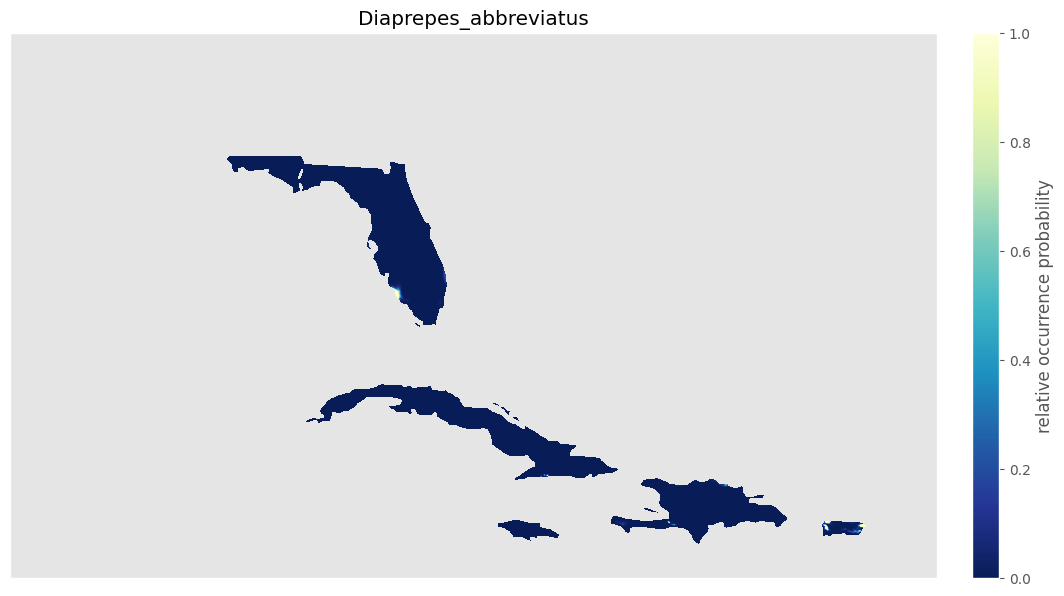

In [21]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot1 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar1 = plt.colorbar(plot1, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [22]:
# Save the colorbar as a TIFF file
colorbar_file1 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Annual_mean_Temperature_Chelsa_Prediction_1981-2010.tif'
cbar1.ax.figure.savefig(colorbar_file1, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_2_Mean_Diurnal_Range_Chelsa_1981-2010.tif

In [23]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[1], count=10_000)
background.head()

0    POINT (-75.93935 22.13397)
1    POINT (-92.67289 31.21404)
2    POINT (-84.83485 24.94735)
3    POINT (-80.25209 24.81334)
4    POINT (-66.57794 32.56278)
dtype: geometry

In [24]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [25]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [26]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [27]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.910


In [28]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model2c.ela')

# Write the model predictions to disk
output_raster2 = 'Mean_Diurnal_Range_Chelsa_Prediction_1981-2010.tif'

ela.apply_model_to_rasters(model, bioclimate_variables, output_raster2, quiet=True)

In [29]:
# Read into memory
with rio.open(output_raster2, 'r') as src:
    pred = src.read(1, masked=True)

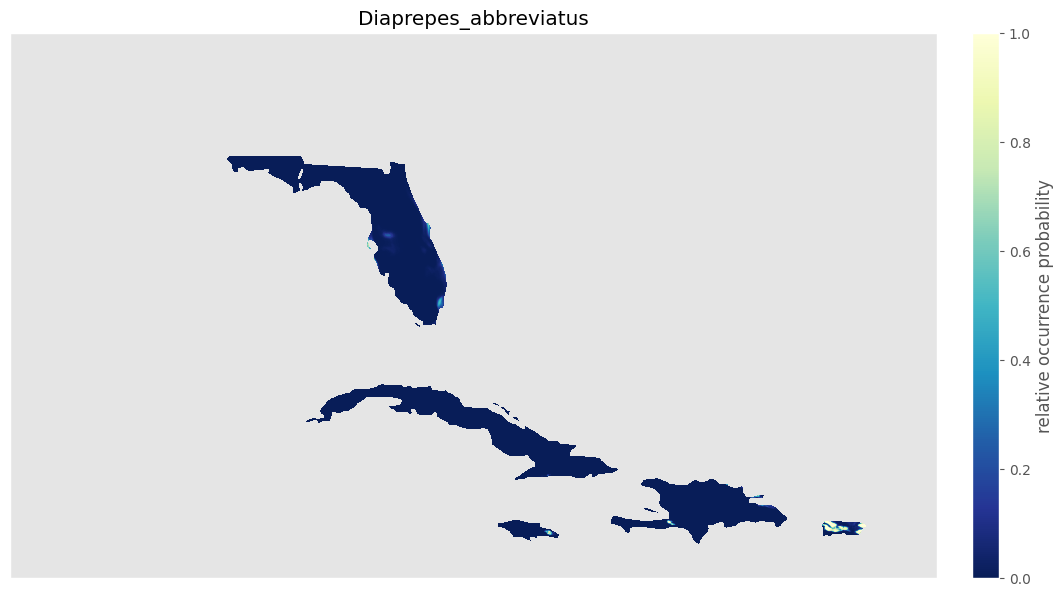

In [30]:
# Plot the Suitability Predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot2 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar2 = plt.colorbar(plot2, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [31]:
# Save the colorbar as a TIFF file
colorbar_file2 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Mean_Diurnal_Range_Chelsa_1981-2010.tif'
cbar2.ax.figure.savefig(colorbar_file2, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_3_Isothermality_Chelsa_1981-2010.tif

In [32]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[2], count=10_000)
background.head()

0    POINT (-88.67517 20.28890)
1    POINT (-80.26683 20.35557)
2    POINT (-78.80017 27.64723)
3    POINT (-69.08350 32.77223)
4    POINT (-91.20850 20.70557)
dtype: geometry

In [33]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [34]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [35]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [36]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.911


In [37]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model3c.ela')

# Write the model predictions to disk
output_raster3 = 'Isothermality_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster3, quiet=True)

In [38]:
# Read into memory
with rio.open(output_raster3, 'r') as src:
    pred = src.read(1, masked=True)

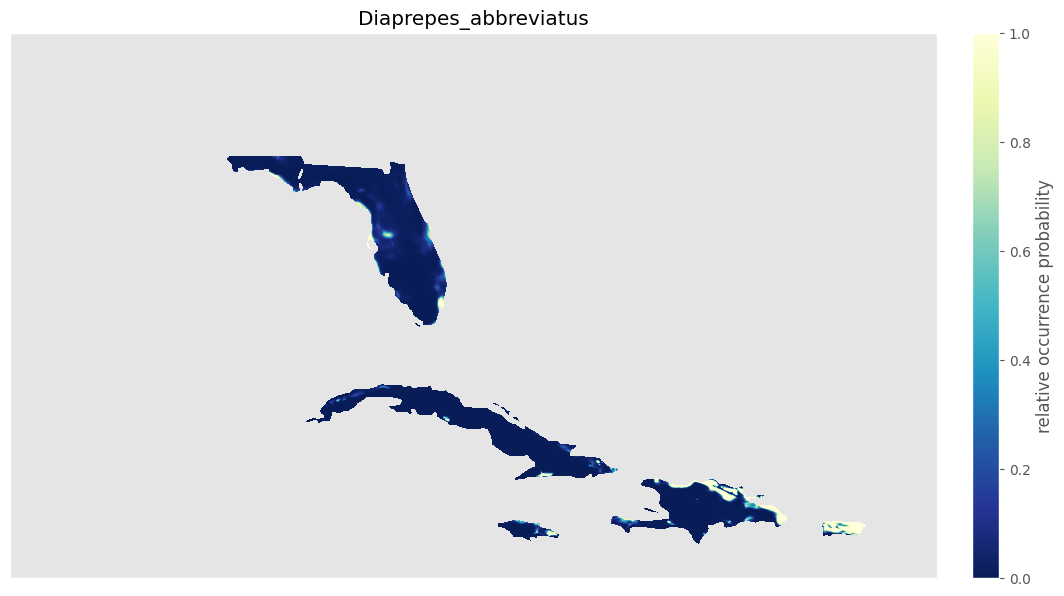

In [39]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot3 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar3 = plt.colorbar(plot3, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [40]:
# Save the colorbar as a TIFF file
colorbar_file3 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Isothermality_Chelsa_Prediction_1981-2010.tif'
cbar3.ax.figure.savefig(colorbar_file3, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_4_Temperature_Seasonality_Chelsa_1981-2010.tif

In [41]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[3], count=10_000)
background.head()

0    POINT (-81.52123 33.74643)
1    POINT (-68.05774 26.73104)
2    POINT (-77.92503 16.85685)
3    POINT (-92.80833 23.67797)
4    POINT (-88.09135 26.46779)
dtype: geometry

In [42]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [43]:
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [44]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [45]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.915


In [46]:
# Save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model4c.ela')

# Write the model predictions to disk
output_raster4 = 'Temperature_Seasonality_Chelsa_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster4, quiet=True)

In [47]:
# Read into memory
with rio.open(output_raster4, 'r') as src:
    pred = src.read(1, masked=True)


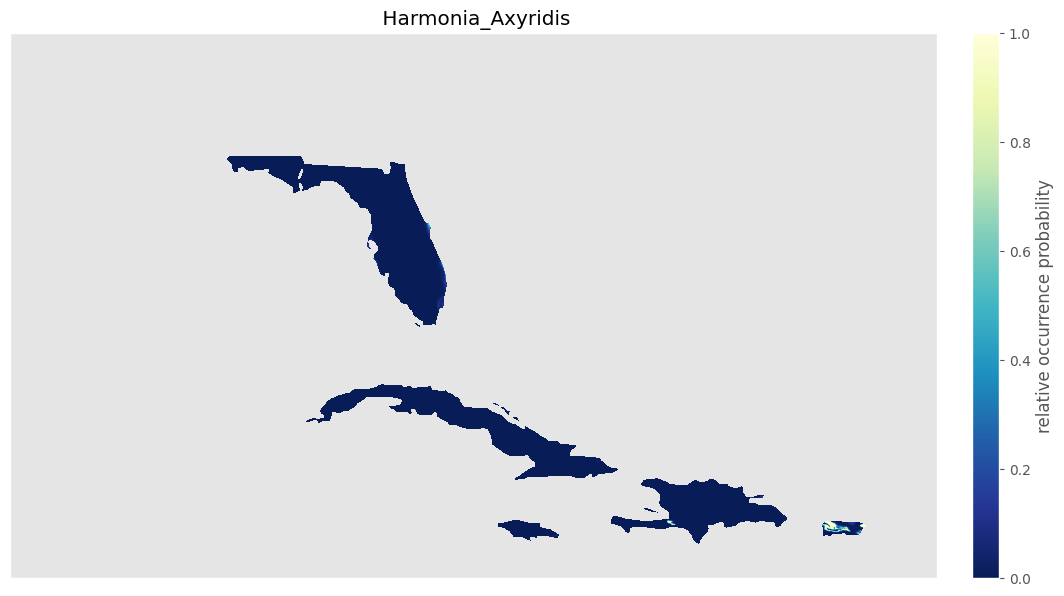

In [48]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot4 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title(' Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar4 = plt.colorbar(plot4, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [49]:
# Save the colorbar as a TIFF file
colorbar_file4 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Temperature_Seasonality_Chelsa_1981-2010.tif'
cbar4.ax.figure.savefig(colorbar_file4, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_5_Maximum_Temperature_of_Warmest_Month_Chelsa_1981-2010.tif

In [50]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[4], count=10_000)
background.head()

0    POINT (-66.16138 21.23648)
1    POINT (-91.84100 32.20777)
2    POINT (-94.34801 30.89053)
3    POINT (-72.83571 24.65567)
4    POINT (-74.39574 18.40801)
dtype: geometry

In [51]:
# Merge Datasets and Read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [52]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [53]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [54]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.913


In [55]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model5c.ela')

#Write the model predictions to disk
output_raster5 = 'Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster5, quiet=True)

In [56]:
# Read into memory
with rio.open(output_raster5, 'r') as src:
    pred = src.read(1, masked=True)


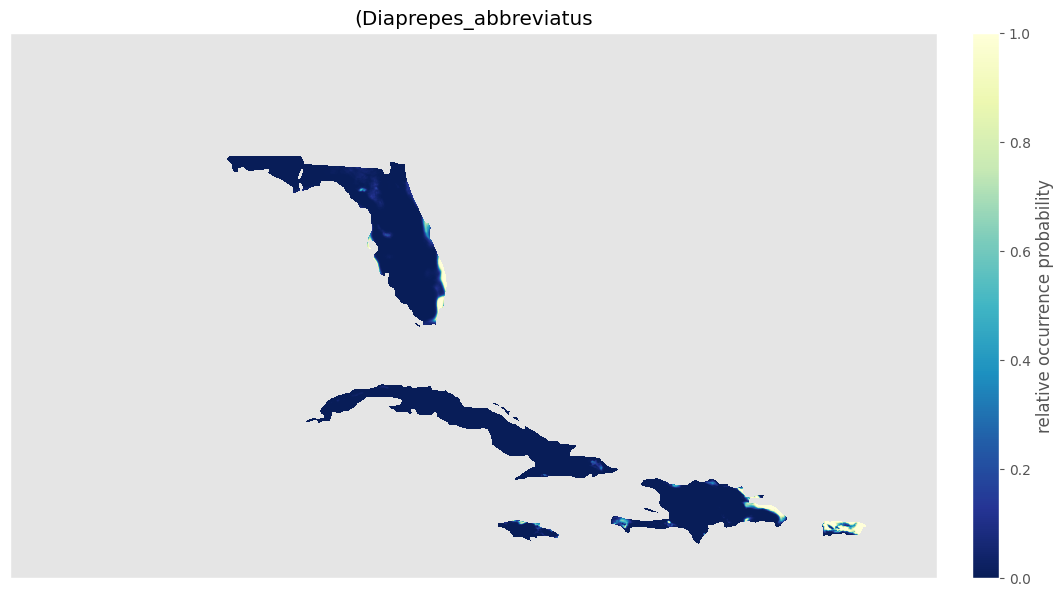

In [57]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot5 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('(Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar5 = plt.colorbar(plot5, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [58]:
# Save the colorbar as a TIFF file
colorbar_file5 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Maximum_Temperature_of_Warmest_Month_Chelsa_Prediction_1981-2010.tif'
cbar5.ax.figure.savefig(colorbar_file5, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_6_Minimum_Temperature_of_Coldest_Month_Chelsa_1981-2010.tif


In [59]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[5], count=10_000)
background.head()

0    POINT (-93.59398 19.79757)
1    POINT (-86.28794 28.07531)
2    POINT (-71.56140 20.10510)
3    POINT (-79.95011 31.53099)
4    POINT (-74.78239 22.15942)
dtype: geometry

In [60]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [61]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [62]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [63]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.913


In [64]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model6c.ela')

# Write the model predictions to disk
output_raster6 = 'Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster6, quiet=True)

In [65]:
# Read into memory
with rio.open(output_raster6, 'r') as src:
    pred = src.read(1, masked=True)


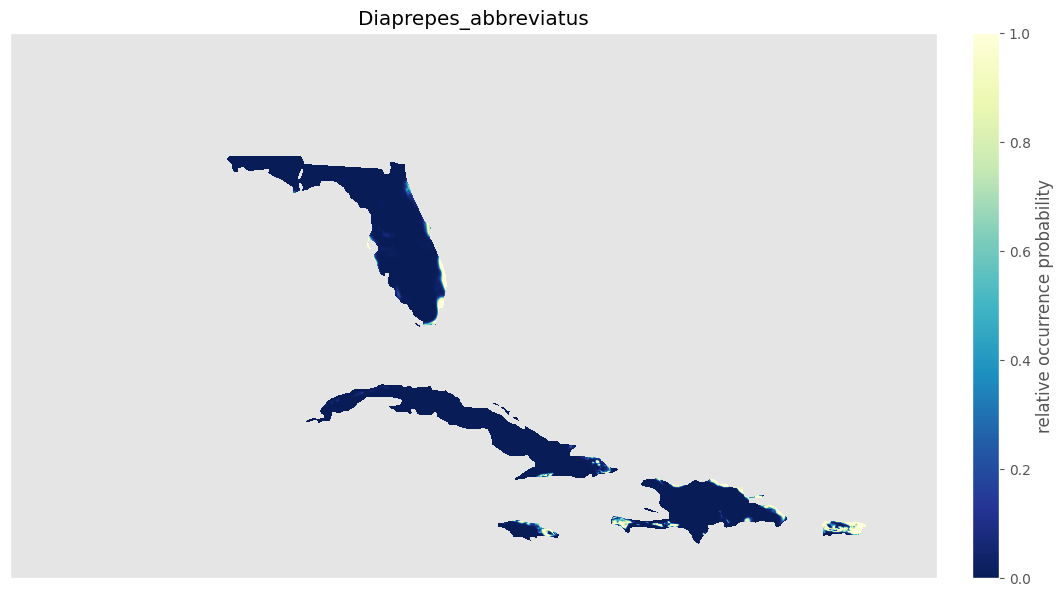

In [66]:
 # Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot6 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar6 = plt.colorbar(plot6, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [67]:
# Save the colorbar as a TIFF file
colorbar_file6 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Minimum_Temperature_of_Coldest_Month_Chelsa_Prediction_1981-2010.tif'
cbar6.ax.figure.savefig(colorbar_file6, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_7_Temperature_Annual_Range_Chelsa_1981-2010

In [68]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[6], count=10_000)
background.head()

0    POINT (-82.18211 22.04204)
1    POINT (-64.66655 25.51490)
2    POINT (-87.97337 29.10793)
3    POINT (-68.58730 32.54977)
4    POINT (-81.89200 21.36404)
dtype: geometry

In [69]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [70]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [71]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [72]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.909


In [73]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model7c.ela')

# Write the model predictions to disk
output_raster7 = 'Temperature_Annual_Range_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster7, quiet=True)

In [74]:
# Read into memory
with rio.open(output_raster7, 'r') as src:
    pred = src.read(1, masked=True)


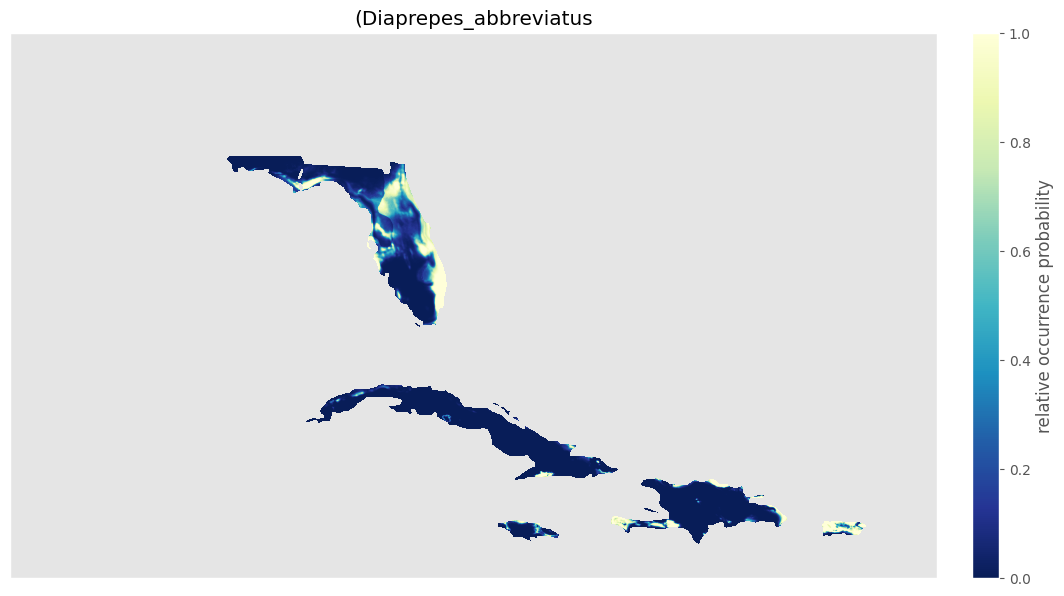

In [75]:

# Plot the Suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot7 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('(Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar7 = plt.colorbar(plot7, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [76]:
# Save the colorbar as a TIFF file
colorbar_file7 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Temperature_Annual_Range_Chelsa_Prediction_1981-2010.tif'
cbar7.ax.figure.savefig(colorbar_file7, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_8_Mean_Temperature_of_Wettest_Quarter_Chelsa_1981-2010.tif

In [77]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[7], count=10_000)
background.head()

0    POINT (-64.10850 34.82223)
1    POINT (-64.15850 34.86390)
2    POINT (-87.76683 16.88890)
3    POINT (-84.86683 32.43890)
4    POINT (-66.69183 32.88057)
dtype: geometry

In [78]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [79]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [80]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [81]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.912


In [82]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model8c.ela')

# Write the model predictions to disk
output_raster8 = 'Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster8, quiet=True)

In [83]:
# Read into memory
with rio.open(output_raster8, 'r') as src:
    pred = src.read(1, masked=True)


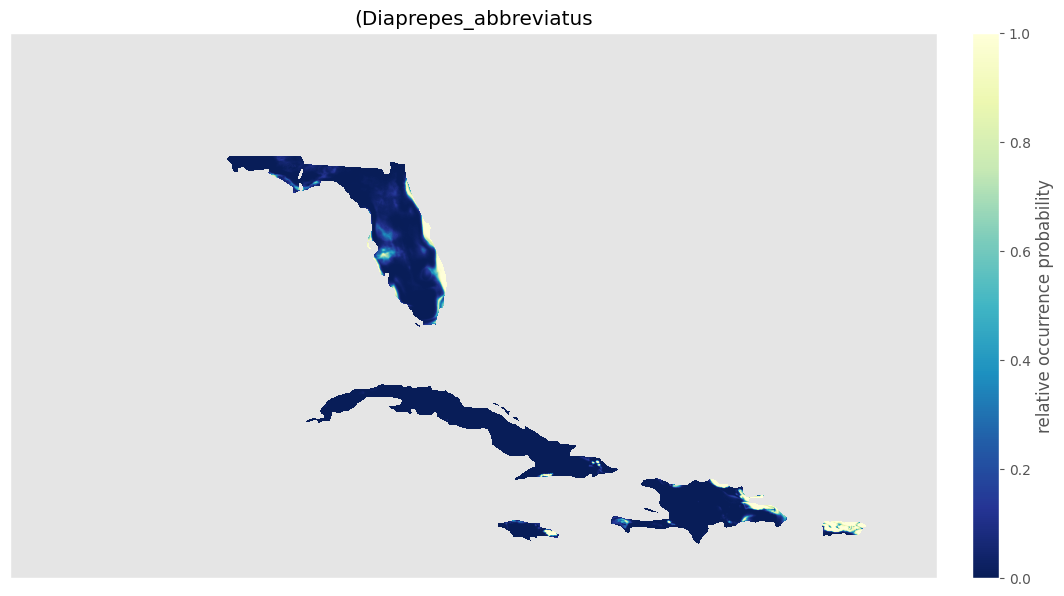

In [84]:
   # Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot8 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('(Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar8 = plt.colorbar(plot8, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [85]:
# Save the colorbar as a TIFF file
colorbar_file = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Mean_Temperature_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar8.ax.figure.savefig(colorbar_file, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_9_Mean_Temperature_of_Driest_Quarter_Chelsa_1981-2010.tif

In [86]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[8], count=10_000)
background.head()

0    POINT (-75.18350 22.73890)
1    POINT (-88.12517 33.51390)
2    POINT (-73.18350 33.20557)
3    POINT (-89.24183 29.32223)
4    POINT (-90.45850 22.89723)
dtype: geometry

In [87]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [88]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [89]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [90]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.918


In [91]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model9c.ela')

# Write the model predictions to disk
output_raster9 = 'Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster9, quiet=True)

# Read into memory
with rio.open(output_raster9, 'r') as src:
    pred = src.read(1, masked=True)


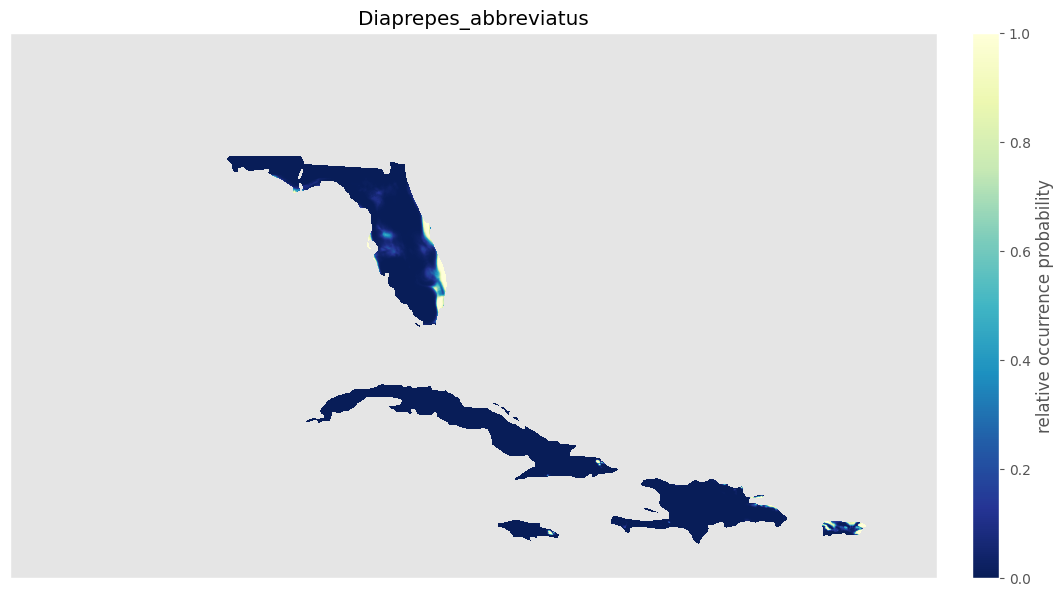

In [92]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot9 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_yticks([])
ax.set_xticks([])
cbar9 = plt.colorbar(plot9, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [93]:
# Save the colorbar as a TIFF file
colorbar_file9 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Mean_Temperature_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar9.ax.figure.savefig(colorbar_file9, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_10_Mean_Temperature_of_Warmest_Quarter_Chelsa_1981-2010.tif

In [94]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[9], count=10_000)
background.head()

0    POINT (-85.92517 32.38057)
1    POINT (-88.70017 20.27223)
2    POINT (-76.92517 34.84723)
3    POINT (-85.05850 28.36390)
4    POINT (-94.20850 18.88057)
dtype: geometry

In [95]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [96]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [97]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [98]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.914


In [99]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster10 = 'Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster10, quiet=True)

# Read into memory
with rio.open(output_raster10, 'r') as src:
    pred = src.read(1, masked=True)


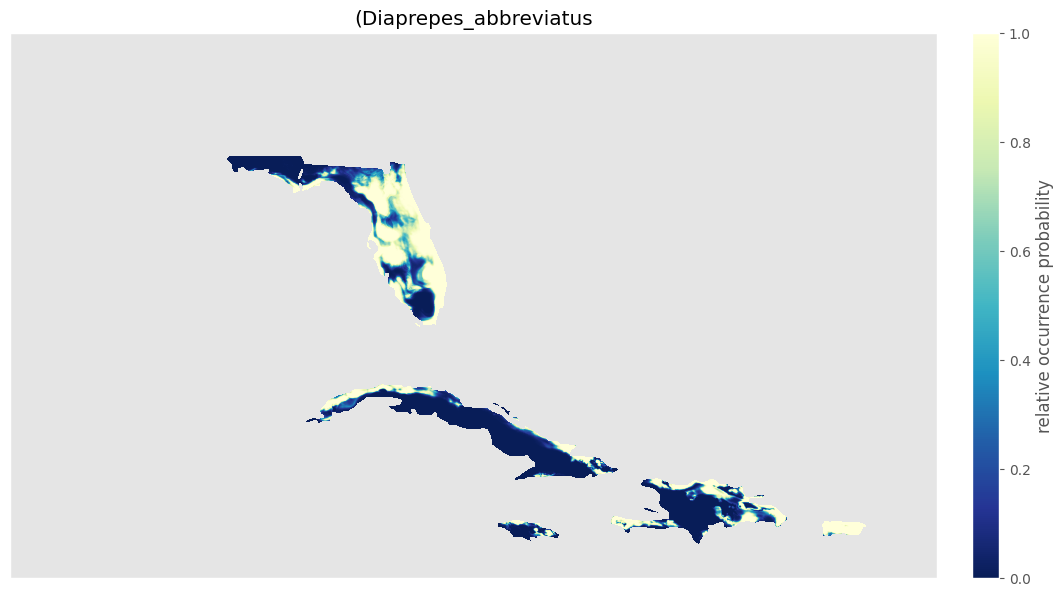

In [100]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot10 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('(Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar10 = plt.colorbar(plot10, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [101]:
# Save the colorbar as a TIFF file
colorbar_file10 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Mean_Temperature_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar10.ax.figure.savefig(colorbar_file10, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_11_Mean_Temperature_of_Coldest_Quarter_Chelsa_1981-2010.tif

In [102]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[10], count=10_000)
background.head()

0    POINT (-83.85850 34.43057)
1    POINT (-83.88350 32.28890)
2    POINT (-76.05017 18.45557)
3    POINT (-74.11683 29.61390)
4    POINT (-84.41683 16.83057)
dtype: geometry

In [103]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [104]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [105]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [106]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.910


In [107]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model11c.ela')

# Write the model predictions to disk
output_raster11 = 'Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster11, quiet=True)

# Read into memory
with rio.open(output_raster11, 'r') as src:
    pred = src.read(1, masked=True)

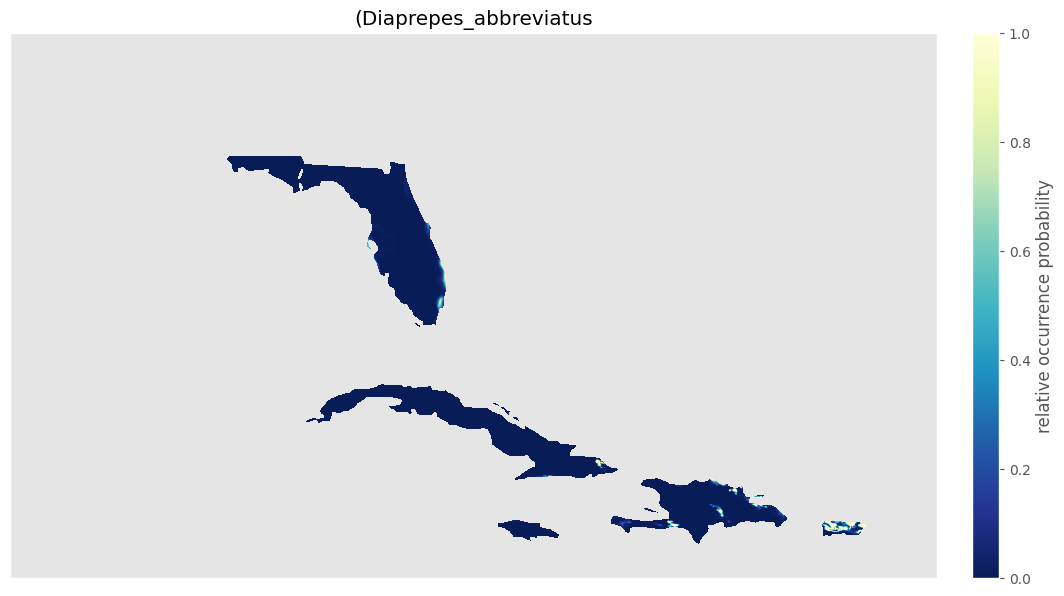

In [108]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot11 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('(Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar11 = plt.colorbar(plot11, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [109]:
# Save the colorbar as a TIFF file
colorbar_file11 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Mean_Temperature_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar11.ax.figure.savefig(colorbar_file11, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_12_Annual_Precipitation_Chelsa_1981-2010.tif

In [110]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[11], count=10_000)
background.head()

0    POINT (-82.79404 33.33950)
1    POINT (-88.58549 31.58679)
2    POINT (-82.18777 34.26477)
3    POINT (-78.08284 29.14613)
4    POINT (-68.30606 28.17183)
dtype: geometry

In [111]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [112]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [113]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [114]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.920


In [115]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model10c.ela')

# Write the model predictions to disk
output_raster12 = 'Annual_Precipitation_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster12, quiet=True)

# Read into memory
with rio.open(output_raster12, 'r') as src:
    pred = src.read(1, masked=True)


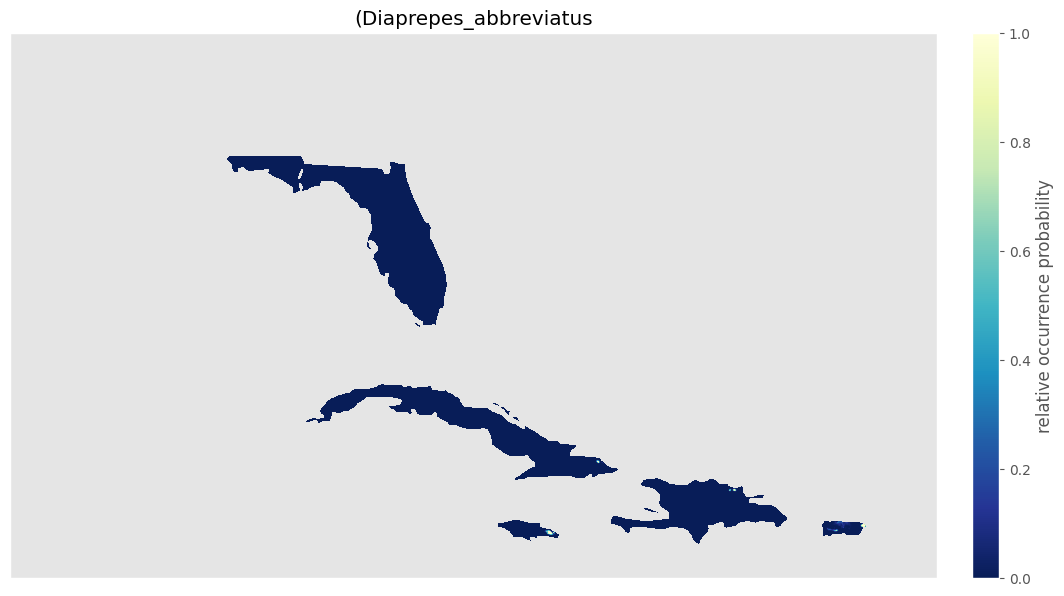

In [116]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot12 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('(Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar12 = plt.colorbar(plot12, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [117]:
# Save the colorbar as a TIFF file
colorbar_file12 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Annual_Precipitation_Chelsa_Prediction_1981-2010.tif'
cbar12.ax.figure.savefig(colorbar_file12, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_13_Precipitation_of_Wettest_Month_Chelsa_1981-2010.tif

In [118]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[12], count=10_000)
background.head()

0    POINT (-76.50014 24.70694)
1    POINT (-80.74468 20.11959)
2    POINT (-83.92845 30.62566)
3    POINT (-65.28214 29.86642)
4    POINT (-91.53811 19.18833)
dtype: geometry

In [119]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [120]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [121]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [122]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.913


In [123]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model13c.ela')

# Write the model predictions to disk
output_raster13 = 'Precipitation_of_Wettest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster13, quiet=True)

# Read into memory
with rio.open(output_raster13, 'r') as src:
    pred = src.read(1, masked=True)


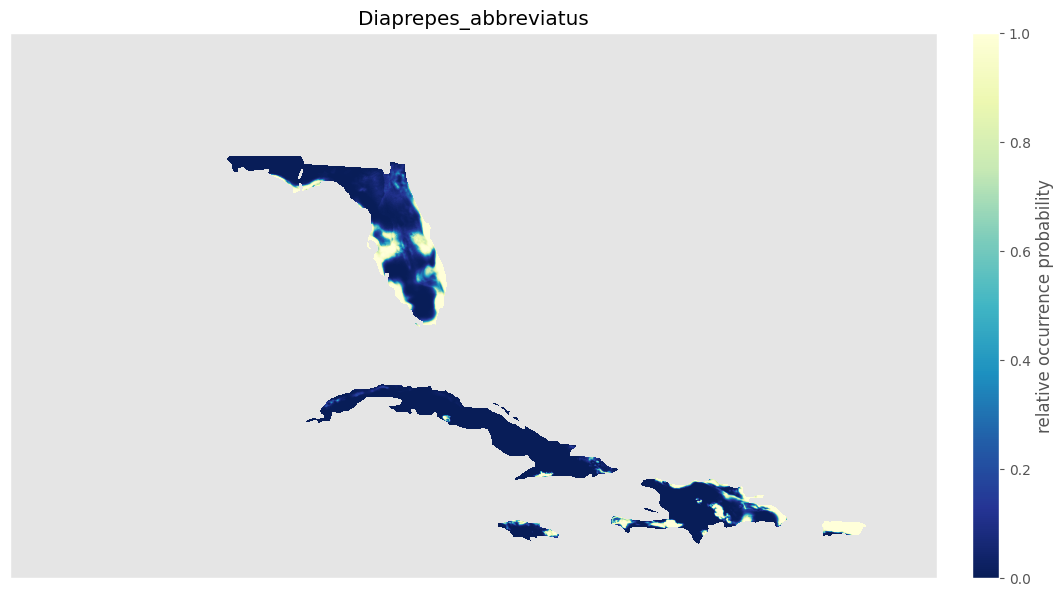

In [124]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot13 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar13 = plt.colorbar(plot13, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [125]:
# Save the colorbar as a TIFF file
colorbar_file13 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Precipitation_of_Wettest_Month_Chelsa_Prediction_1981-2010.tif'
cbar13.ax.figure.savefig(colorbar_file13, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_14_Precipitation_of_Driest_Month_Chelsa_1981-2010.tif

In [126]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[13], count=10_000)
background.head()

0    POINT (-69.47915 18.15276)
1    POINT (-81.82343 26.85097)
2    POINT (-68.88702 22.92380)
3    POINT (-74.35536 19.42713)
4    POINT (-64.59233 32.02714)
dtype: geometry

In [127]:
# merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [128]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [129]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [130]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.915


In [131]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model14c.ela')

# Write the model predictions to disk
output_raster14 = 'Precipitation_of_Driest_Month_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster14, quiet=True)

# Read into memory
with rio.open(output_raster14, 'r') as src:
    pred = src.read(1, masked=True)


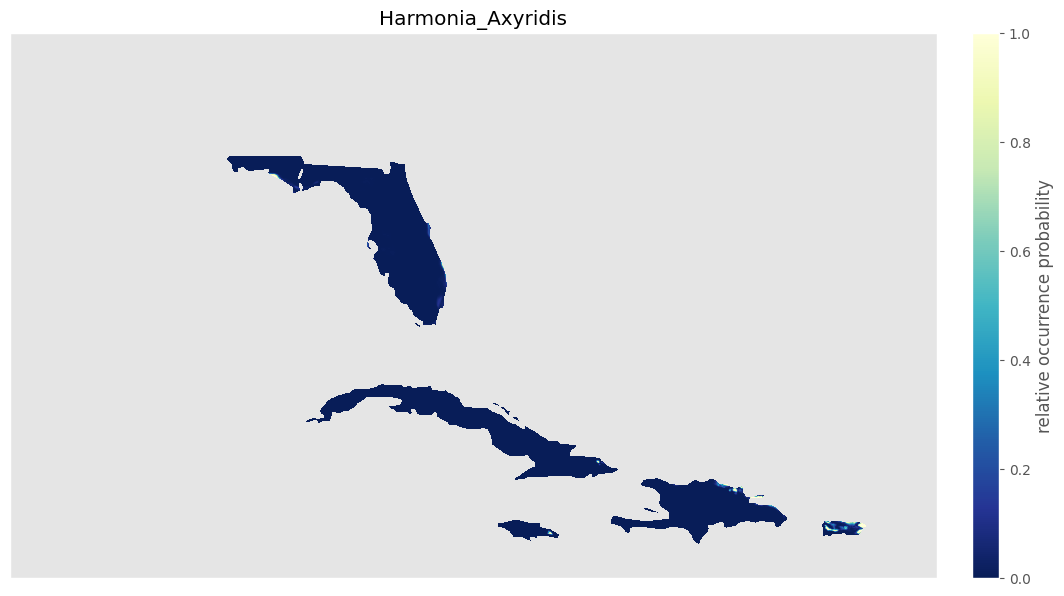

In [132]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot14 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Harmonia_Axyridis')
ax.set_xticks([])
ax.set_yticks([])
cbar14 = plt.colorbar(plot14, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [133]:
# Save the colorbar as a TIFF file
colorbar_file14 = '//content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Precipitation_of_Driest_Month_Chelsa_Prediction_1981-2010.tif'
cbar14.ax.figure.savefig(colorbar_file14, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_15_Precipitation_of_Seasonality_Chelsa_1981-2010.tif

In [134]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[14], count=10_000)
background.head()

0    POINT (-81.05955 21.14858)
1    POINT (-88.37708 22.89826)
2    POINT (-86.93450 22.54201)
3    POINT (-64.21161 33.29681)
4    POINT (-93.63599 18.32910)
dtype: geometry

In [135]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [136]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [137]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [138]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.916


In [139]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model15c.ela')

# write the model predictions to disk
output_raster15 = 'Precipitation_of_Seasonality_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster15, quiet=True)

# Read into memory
with rio.open(output_raster15, 'r') as src:
    pred = src.read(1, masked=True)


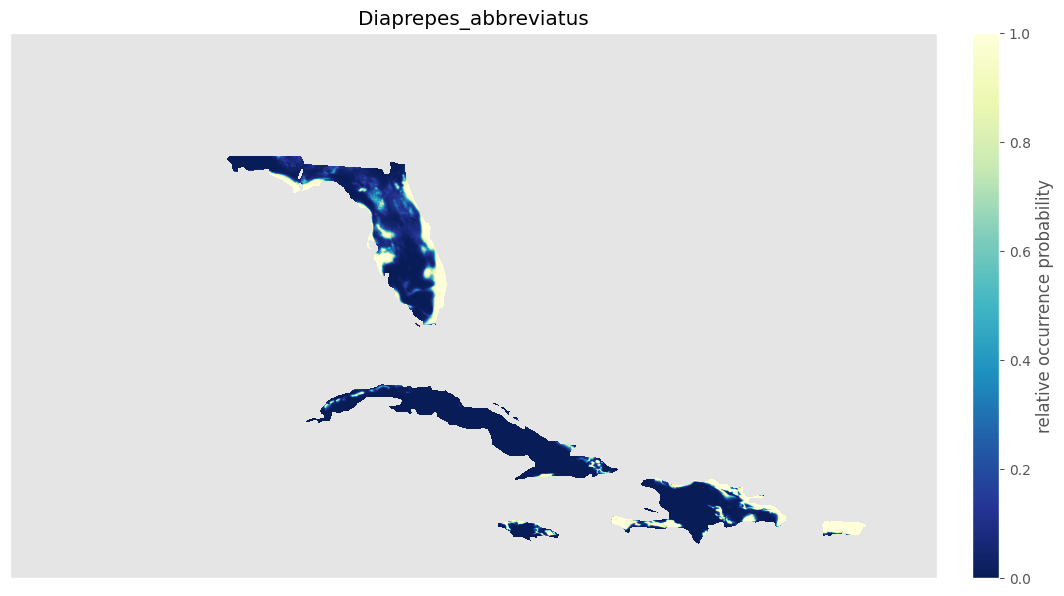

In [140]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot15 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar15 = plt.colorbar(plot15, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [141]:
# Save the colorbar as a TIFF file
colorbar_file15 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Precipitation_of_Seasonality_Chelsa_Prediction_1981-2010.tif'
cbar15.ax.figure.savefig(colorbar_file15, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_16_Precipitation_of_Wettest_Quarter_Chelsa_1981-2010.tif

In [142]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[15], count=10_000)
background.head()

0    POINT (-87.15017 20.48890)
1    POINT (-87.05017 26.36390)
2    POINT (-77.44183 32.48890)
3    POINT (-64.02517 18.95557)
4    POINT (-87.88350 22.91390)
dtype: geometry

In [143]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [144]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [145]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [146]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.911


In [147]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model16c.ela')

# Write the model predictions to disk
output_raster16 = 'Precipitation_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster16, quiet=True)

# Read into memory
with rio.open(output_raster16, 'r') as src:
    pred = src.read(1, masked=True)


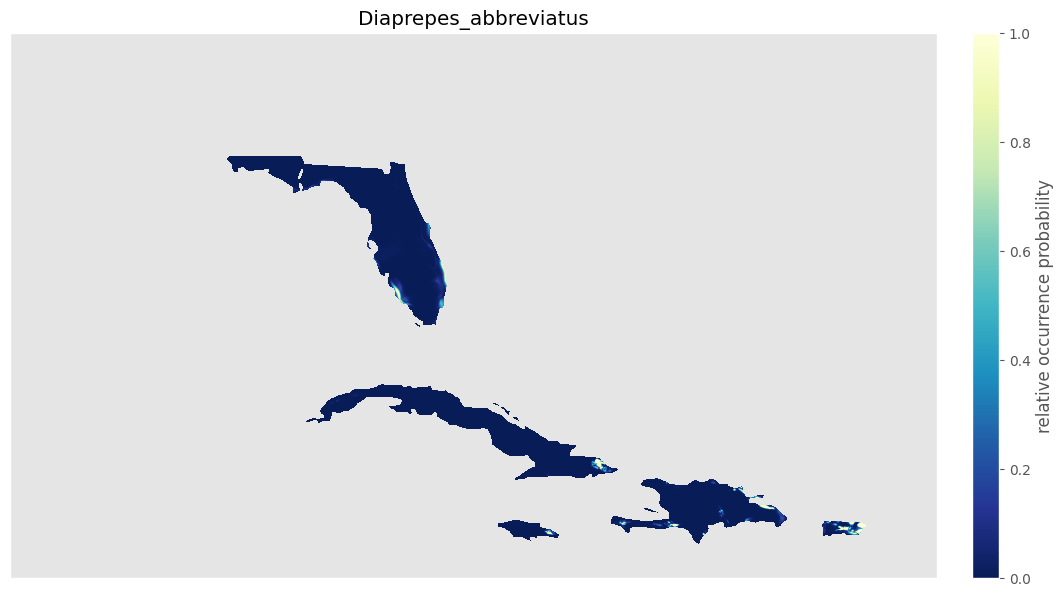

In [148]:
# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot16 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar16 = plt.colorbar(plot16, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [149]:
# Save the colorbar as a TIFF file
colorbar_file16 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Precipitation_of_Wettest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar16.ax.figure.savefig(colorbar_file16, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_17_Precipitation_of_Driest_Quarter_Chelsa_1981-2010.tif

In [150]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[16], count=10_000)
background.head()

0    POINT (-85.84183 25.81390)
1    POINT (-74.75017 16.73057)
2    POINT (-91.86683 33.79723)
3    POINT (-68.45017 24.58057)
4    POINT (-91.31683 18.40557)
dtype: geometry

In [151]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [152]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [153]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [154]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.907


In [155]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model17c.ela')

# Write the model predictions to disk
output_raster17 = 'Precipitation_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster17, quiet=True)

# Read into memory
with rio.open(output_raster17, 'r') as src:
    pred = src.read(1, masked=True)


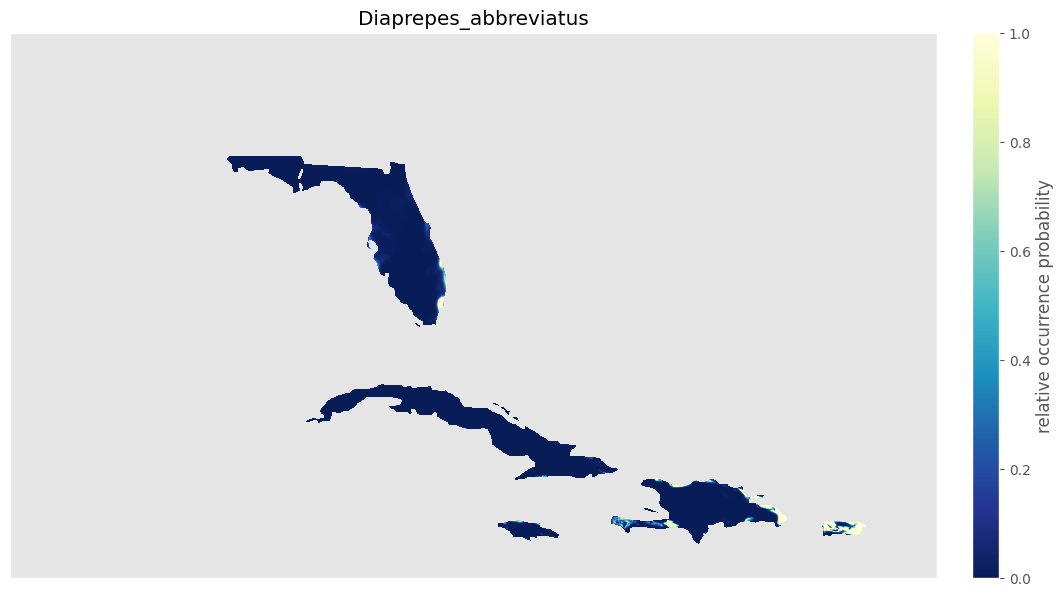

In [156]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot17 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar17 = plt.colorbar(plot17, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [157]:
# Save the colorbar as a TIFF file
colorbar_file17 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Precipitation_of_Driest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar17.ax.figure.savefig(colorbar_file17, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_18_Precipitation_of_Warmest_Quarter_Chelsa_1981-2010.tif

In [158]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[17], count=10_000)
background.head()

0    POINT (-84.90017 29.87223)
1    POINT (-90.47517 28.26390)
2    POINT (-90.07517 28.86390)
3    POINT (-64.57517 25.13057)
4    POINT (-94.37517 23.61390)
dtype: geometry

In [159]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [160]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [161]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [162]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.918


In [163]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model18c.ela')

# Write the model predictions to disk
output_raster18 = 'Precipitation_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster18, quiet=True)

# Read into memory
with rio.open(output_raster18, 'r') as src:
    pred = src.read(1, masked=True)


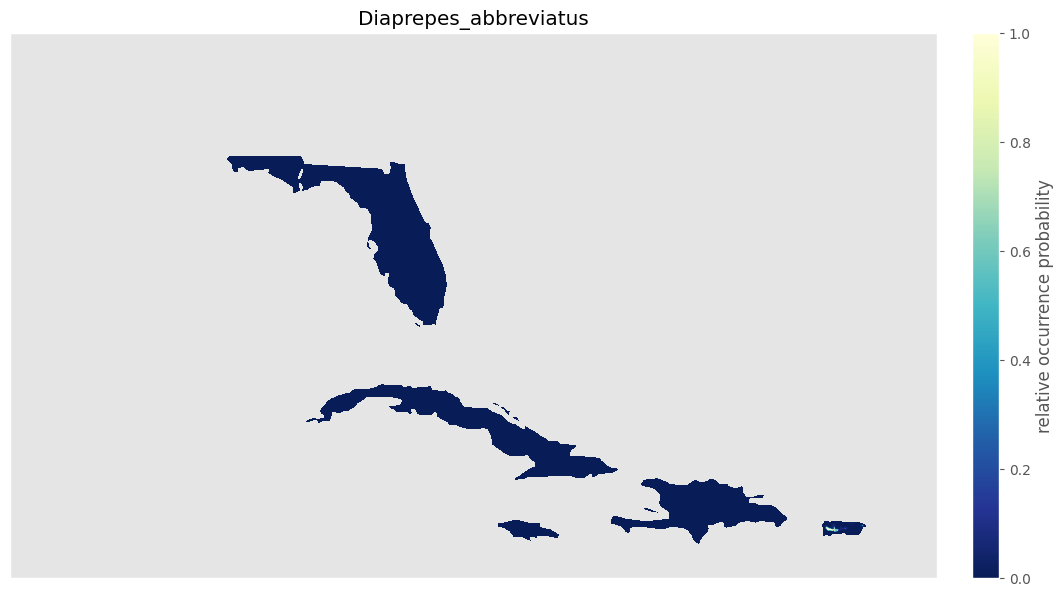

In [164]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot18 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar18 = plt.colorbar(plot18, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [165]:
# Save the colorbar as a TIFF file
colorbar_file18 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Precipitation_of_Warmest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar18.ax.figure.savefig(colorbar_file18, format='tiff')

# Close the figure to free up memory
plt.close(fig)

# Bio_19_Precipitation_of_Coldest_Quarter_Chelsa_1981-2010.tif

In [166]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
background = ela.sample_raster(bioclimate_variables[18], count=10_000)
background.head()

0    POINT (-66.46683 24.55557)
1    POINT (-87.43350 29.61390)
2    POINT (-92.60850 32.60557)
3    POINT (-88.36683 20.83057)
4    POINT (-92.45017 31.56390)
dtype: geometry

In [167]:
# Merge datasets and read the covariates at each point location
merged = ela.stack_geodataframes(presence, background, add_class_label=True)
merged.head()

,geometry,class
0,POINT (-80.23778 26.08269),1
1,POINT (-81.32407 28.81363),1
2,POINT (-95.41731 29.75517),1
3,POINT (-95.56207 29.95886),1
4,POINT (-95.03116 29.58495),1


In [168]:
# Create a Random Geographic Sample Points based on the tiff file/ Select from unmasked loaction if there is no data and Count - generate the random sample
annotated = ela.annotate(merged, bioclimate_variables, drop_na=True, quiet=True)
annotated.head()

# Split the x/y data
x = annotated.drop(columns=['class', 'geometry'])
y = annotated['class']

In [169]:
# Train the model
model = ela.MaxentModel(transform='cloglog', beta_multiplier=2.0)
model.fit(x, y)

MaxentModel(beta_multiplier=2.0)

In [170]:
# Evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.922


In [171]:
# save the fitted model to disk
#ela.save_object(model, 'demo-maxent-model19c.ela')

# Write the model predictions to disk
output_raster19 = 'Precipitation_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'

#Applies a trained model to a list of raster datasets
ela.apply_model_to_rasters(model, bioclimate_variables, output_raster19, quiet=True)

# Read into memory
with rio.open(output_raster19, 'r') as src:
    pred = src.read(1, masked=True)


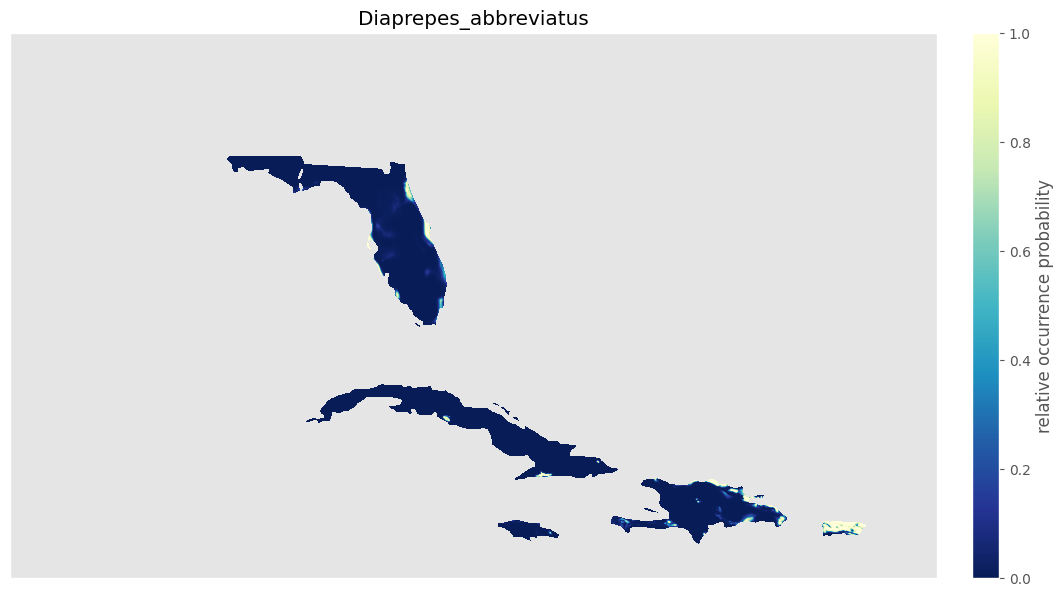

In [172]:

# Plot the suitability predictions
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=100)
plot19 = ax.imshow(pred, vmin=0, vmax=1, cmap='YlGnBu_r')
ax.set_title('Diaprepes_abbreviatus')
ax.set_xticks([])
ax.set_yticks([])
cbar19 = plt.colorbar(plot19, ax=ax, label="relative occurrence probability", pad=0.03)
plt.tight_layout()

In [173]:
# Save the colorbar as a TIFF file
colorbar_file19 = '/content/drive/MyDrive/Project_2/Insect Pest/tif files/Chelsa_pred_1981_2010_for_Diaprepes_abbreviatus/Precipitation_of_Coldest_Quarter_Chelsa_Prediction_1981-2010.tif'
cbar19.ax.figure.savefig(colorbar_file19, format='tiff')

# Close the figure to free up memory
plt.close(fig)